<a href="https://colab.research.google.com/github/Hamza1407/DataAnalysisProjects/blob/main/TP_GOURIVEAU_STAT_DESCRIP__2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import warnings
from sklearn.decomposition import PCA

warnings.filterwarnings("ignore")



In [ ]:
df=pd.read_csv('/content/Sales_Transactions_Dataset_Weekly.csv')

In [ ]:
df

,Product_Code,W0,W1,W2,W3,W4,W5,W6,W7,W8,...,Normalized 42,Normalized 43,Normalized 44,Normalized 45,Normalized 46,Normalized 47,Normalized 48,Normalized 49,Normalized 50,Normalized 51
0,P1,11,12,10,8,13,12,14,21,6,...,0.06,0.22,0.28,0.39,0.50,0.00,0.22,0.17,0.11,0.39
1,P2,7,6,3,2,7,1,6,3,3,...,0.20,0.40,0.50,0.10,0.10,0.40,0.50,0.10,0.60,0.00
2,P3,7,11,8,9,10,8,7,13,12,...,0.27,1.00,0.18,0.18,0.36,0.45,1.00,0.45,0.45,0.36
3,P4,12,8,13,5,9,6,9,13,13,...,0.41,0.47,0.06,0.12,0.24,0.35,0.71,0.35,0.29,0.35
4,P5,8,5,13,11,6,7,9,14,9,...,0.27,0.53,0.27,0.60,0.20,0.20,0.13,0.53,0.33,0.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
806,P815,0,0,1,0,0,2,1,0,0,...,0.00,0.33,0.33,0.00,0.00,0.33,0.00,0.00,0.67,0.00
807,P816,0,1,0,0,1,2,2,6,0,...,0.43,0.43,0.57,0.29,0.57,0.71,0.71,0.71,0.86,0.71
808,P817,1,0,0,0,1,1,2,1,1,...,0.50,0.00,0.00,0.50,0.50,0.00,0.00,0.00,1.00,0.75
809,P818,0,0,0,1,0,0,0,0,1,...,0.00,0.00,0.00,0.50,0.50,0.00,0.00,0.00,1.00,0.00


In [ ]:
L=list(df.columns)
print(L)

['Product_Code', 'W0', 'W1', 'W2', 'W3', 'W4', 'W5', 'W6', 'W7', 'W8', 'W9', 'W10', 'W11', 'W12', 'W13', 'W14', 'W15', 'W16', 'W17', 'W18', 'W19', 'W20', 'W21', 'W22', 'W23', 'W24', 'W25', 'W26', 'W27', 'W28', 'W29', 'W30', 'W31', 'W32', 'W33', 'W34', 'W35', 'W36', 'W37', 'W38', 'W39', 'W40', 'W41', 'W42', 'W43', 'W44', 'W45', 'W46', 'W47', 'W48', 'W49', 'W50', 'W51', 'MIN', 'MAX', 'Normalized 0', 'Normalized 1', 'Normalized 2', 'Normalized 3', 'Normalized 4', 'Normalized 5', 'Normalized 6', 'Normalized 7', 'Normalized 8', 'Normalized 9', 'Normalized 10', 'Normalized 11', 'Normalized 12', 'Normalized 13', 'Normalized 14', 'Normalized 15', 'Normalized 16', 'Normalized 17', 'Normalized 18', 'Normalized 19', 'Normalized 20', 'Normalized 21', 'Normalized 22', 'Normalized 23', 'Normalized 24', 'Normalized 25', 'Normalized 26', 'Normalized 27', 'Normalized 28', 'Normalized 29', 'Normalized 30', 'Normalized 31', 'Normalized 32', 'Normalized 33', 'Normalized 34', 'Normalized 35', 'Normalized 3

On peut s'intéresser dans un premier temps au colonnes Product_Code et aux colonnes des ventes de la semaine 0 à la semaine 51.

In [ ]:
df_weekly=df.iloc[:,0:53]
df_weekly

,Product_Code,W0,W1,W2,W3,W4,W5,W6,W7,W8,...,W42,W43,W44,W45,W46,W47,W48,W49,W50,W51
0,P1,11,12,10,8,13,12,14,21,6,...,4,7,8,10,12,3,7,6,5,10
1,P2,7,6,3,2,7,1,6,3,3,...,2,4,5,1,1,4,5,1,6,0
2,P3,7,11,8,9,10,8,7,13,12,...,6,14,5,5,7,8,14,8,8,7
3,P4,12,8,13,5,9,6,9,13,13,...,9,10,3,4,6,8,14,8,7,8
4,P5,8,5,13,11,6,7,9,14,9,...,7,11,7,12,6,6,5,11,8,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
806,P815,0,0,1,0,0,2,1,0,0,...,0,1,1,0,0,1,0,0,2,0
807,P816,0,1,0,0,1,2,2,6,0,...,3,3,4,2,4,5,5,5,6,5
808,P817,1,0,0,0,1,1,2,1,1,...,2,0,0,2,2,0,0,0,4,3
809,P818,0,0,0,1,0,0,0,0,1,...,0,0,0,1,1,0,0,0,2,0


Essayons de fouiller le jeux de données avec des outils statistiques simples pour mieux le comprendre.

On peut ajouter une nouvelle colonne qui somme le volume des ventes horizontalement sur toute l'année pour chaque produit.

In [ ]:
df_weekly['Total_Volume'] = df_weekly.iloc[:, 1:].sum(axis=1)
df_weekly

,Product_Code,W0,W1,W2,W3,W4,W5,W6,W7,W8,...,W43,W44,W45,W46,W47,W48,W49,W50,W51,Total_Volume
0,P1,11,12,10,8,13,12,14,21,6,...,7,8,10,12,3,7,6,5,10,501
1,P2,7,6,3,2,7,1,6,3,3,...,4,5,1,1,4,5,1,6,0,207
2,P3,7,11,8,9,10,8,7,13,12,...,14,5,5,7,8,14,8,8,7,452
3,P4,12,8,13,5,9,6,9,13,13,...,10,3,4,6,8,14,8,7,8,430
4,P5,8,5,13,11,6,7,9,14,9,...,11,7,12,6,6,5,11,8,9,440
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
806,P815,0,0,1,0,0,2,1,0,0,...,1,1,0,0,1,0,0,2,0,23
807,P816,0,1,0,0,1,2,2,6,0,...,3,4,2,4,5,5,5,6,5,142
808,P817,1,0,0,0,1,1,2,1,1,...,0,0,2,2,0,0,0,4,3,26
809,P818,0,0,0,1,0,0,0,0,1,...,0,0,1,1,0,0,0,2,0,17


On affiche le volume de vente moyen sur l'année.

In [ ]:
print(df_weekly['Total_Volume'].mean())

462.74599260172624


On peut afficher les Product_Code des 5 produits les mieux vendus et les moins vendus.

In [ ]:
df_weekly.sort_values('Total_Volume',ascending=False)

,Product_Code,W0,W1,W2,W3,W4,W5,W6,W7,W8,...,W43,W44,W45,W46,W47,W48,W49,W50,W51,Total_Volume
406,P409,42,48,38,43,35,39,36,38,49,...,41,34,39,44,46,46,41,57,73,2220
33,P34,47,42,24,55,42,23,41,51,45,...,25,38,46,46,34,34,45,41,26,1932
177,P178,35,34,40,36,45,37,43,47,34,...,36,43,31,37,38,42,28,28,26,1925
134,P135,38,32,36,37,42,33,56,37,39,...,30,36,37,34,39,44,31,25,16,1920
42,P43,28,43,40,43,54,33,39,30,38,...,39,34,33,41,43,35,30,29,27,1913
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
714,P721,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
466,P469,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
250,P251,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
253,P254,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


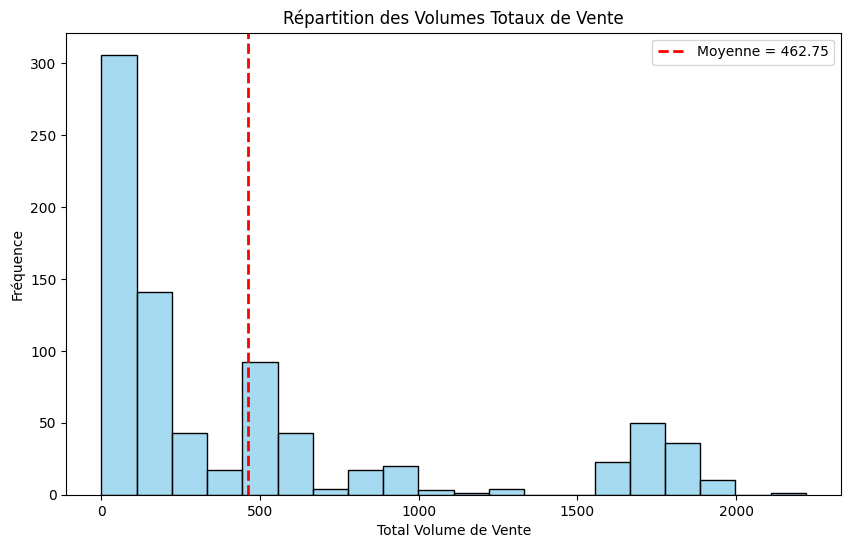

In [ ]:

# Supposons que votre DataFrame s'appelle df et contient la colonne 'Total_Volume'

# Afficher un histogramme de la répartition des volumes totaux de vente avec seaborn
plt.figure(figsize=(10, 6))
sns.histplot(df_weekly['Total_Volume'], bins=20, color='skyblue')

# Ajouter la moyenne
mean_volume = df_weekly['Total_Volume'].mean()
plt.axvline(mean_volume, color='red', linestyle='dashed', linewidth=2, label=f'Moyenne = {mean_volume:.2f}')

# Ajouter les fréquences

plt.title('Répartition des Volumes Totaux de Vente')
plt.xlabel('Total Volume de Vente')
plt.ylabel('Fréquence')
plt.legend()
plt.show()


On peut aggréger les données par mois de manière à avoir le total des ventes mensuel et voire si on peut en tirer des tendances temporelles.

In [ ]:
volume_columns = df_weekly.columns[1:-1]
volume_columns

Index(['W0', 'W1', 'W2', 'W3', 'W4', 'W5', 'W6', 'W7', 'W8', 'W9', 'W10',
       'W11', 'W12', 'W13', 'W14', 'W15', 'W16', 'W17', 'W18', 'W19', 'W20',
       'W21', 'W22', 'W23', 'W24', 'W25', 'W26', 'W27', 'W28', 'W29', 'W30',
       'W31', 'W32', 'W33', 'W34', 'W35', 'W36', 'W37', 'W38', 'W39', 'W40',
       'W41', 'W42', 'W43', 'W44', 'W45', 'W46', 'W47', 'W48', 'W49', 'W50',
       'W51'],
      dtype='object')

On réorganise les colonnes par groupes de 4 semaines :

In [ ]:
grouped_columns = [volume_columns[i:i+4] for i in range(0, len(volume_columns), 4)]
grouped_columns

[Index(['W0', 'W1', 'W2', 'W3'], dtype='object'),
 Index(['W4', 'W5', 'W6', 'W7'], dtype='object'),
 Index(['W8', 'W9', 'W10', 'W11'], dtype='object'),
 Index(['W12', 'W13', 'W14', 'W15'], dtype='object'),
 Index(['W16', 'W17', 'W18', 'W19'], dtype='object'),
 Index(['W20', 'W21', 'W22', 'W23'], dtype='object'),
 Index(['W24', 'W25', 'W26', 'W27'], dtype='object'),
 Index(['W28', 'W29', 'W30', 'W31'], dtype='object'),
 Index(['W32', 'W33', 'W34', 'W35'], dtype='object'),
 Index(['W36', 'W37', 'W38', 'W39'], dtype='object'),
 Index(['W40', 'W41', 'W42', 'W43'], dtype='object'),
 Index(['W44', 'W45', 'W46', 'W47'], dtype='object'),
 Index(['W48', 'W49', 'W50', 'W51'], dtype='object')]

In [ ]:
for i in range(len(grouped_columns)):
    df_weekly[f'M{i}'] = df_weekly.loc[:, list(grouped_columns[i])].sum(axis=1)

On aura donc le volume des ventes mensuel :

In [ ]:
Mois=list(df_weekly.columns)[-13:-1]
Mois=['Product_Code']+Mois
df_monthly=df_weekly[Mois]
df_monthly

,Product_Code,M0,M1,M2,M3,M4,M5,M6,M7,M8,M9,M10,M11
0,P1,41,60,45,43,38,35,31,33,37,48,29,33
1,P2,18,17,10,14,25,17,21,14,18,17,13,11
2,P3,35,38,41,31,35,39,37,36,31,39,28,25
3,P4,38,37,36,31,39,31,35,17,41,30,37,21
4,P5,37,36,47,33,44,36,37,24,26,25,31,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...
806,P815,1,3,1,3,3,1,0,2,0,3,2,2
807,P816,1,11,3,8,7,4,16,8,14,15,19,15
808,P817,1,5,2,0,0,1,2,0,1,0,3,4
809,P818,1,0,1,0,1,1,4,3,2,0,0,2


  On peut donc afficher la vente totale des articles par mois.

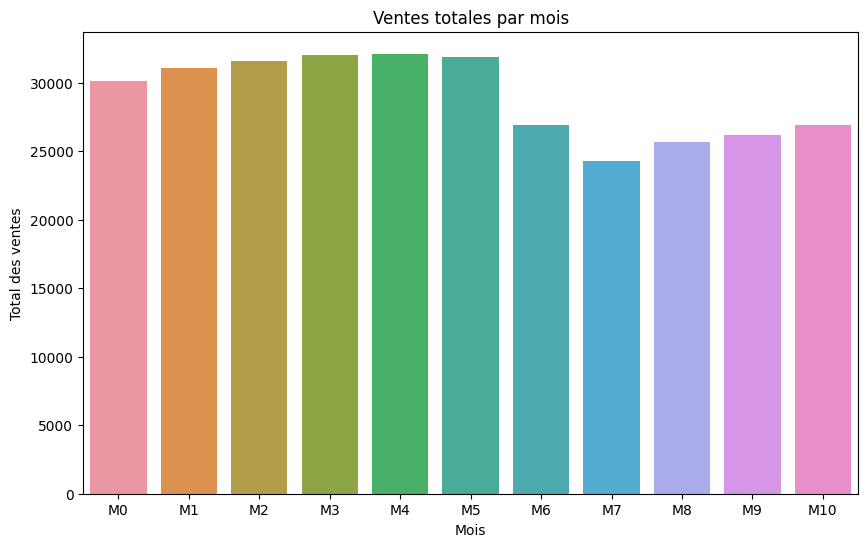

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x=df_monthly.columns[1:-1], y=df_monthly.iloc[:, 1:-1].sum())
plt.title('Ventes totales par mois')
plt.xlabel('Mois')
plt.ylabel('Total des ventes')
plt.show()


On remarque que les ventes dans la deuxième partie de l'année sont légèrement même moins importantes que celle des 6 premièrs mois. Il faut faire attention ici, car il ne s'agit que d'une observation sur le tas. On peut par exemple remarquer que le produit dont le Product_Code est 816 a une distribution des volumes de vente totalement opposé à celui remarqué en haut.

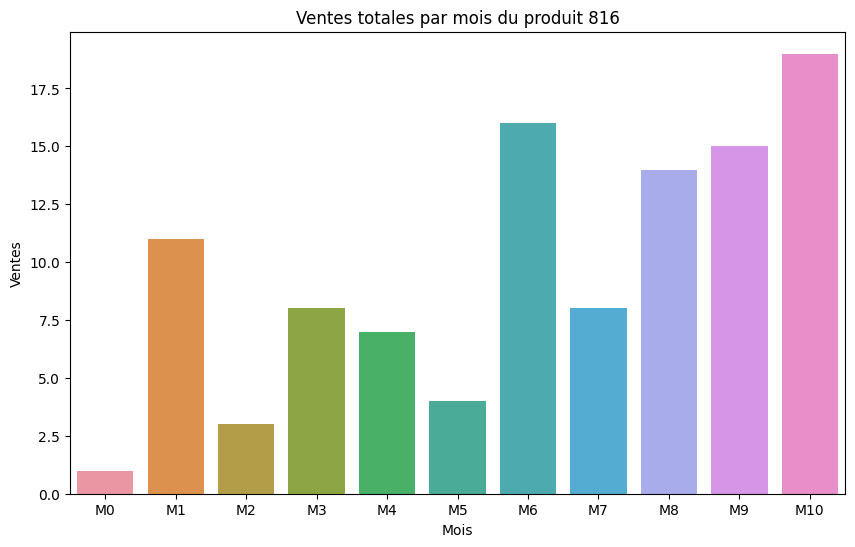

In [ ]:
df_816=df_monthly.iloc[807:808,:]

plt.figure(figsize=(10, 6))
sns.barplot(x=df_816.columns[1:-1], y=df_816.iloc[:, 1:-1].sum())
plt.title('Ventes totales par mois du produit 816')
plt.xlabel('Mois')
plt.ylabel('Ventes')
plt.show()


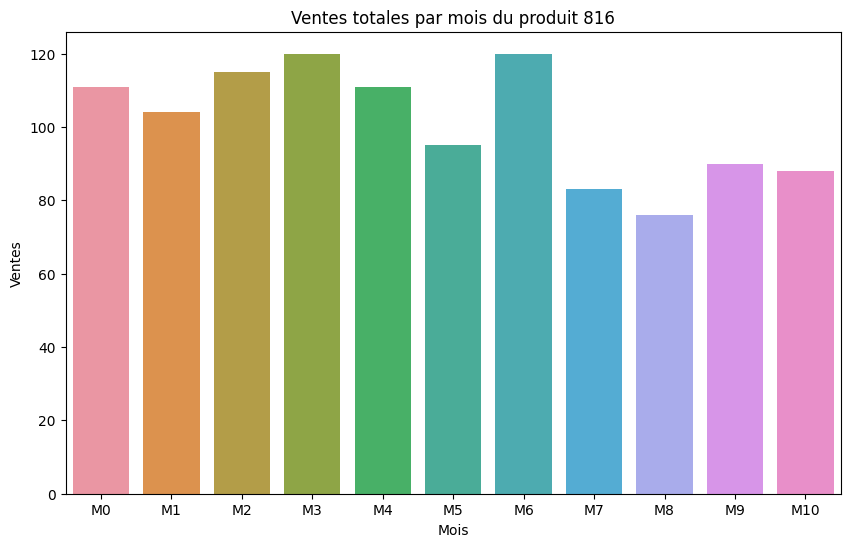

In [ ]:
df_511=df_monthly.iloc[508:509,:]

plt.figure(figsize=(10, 6))
sns.barplot(x=df_511.columns[1:-1], y=df_511.iloc[:, 1:-1].sum())
plt.title('Ventes totales par mois du produit 816')
plt.xlabel('Mois')
plt.ylabel('Ventes')
plt.show()


Donc raisonner sur le volume totale des ventes ne nous donne pas forcément un point de vue détaillée des données.

Cette conclusion peut nous pousser à envisage de faire un algorithme de cluestering, afin de pouvoir clusteriser les Produits en différents groupes selon la répartition des ventes sur l'année.

Avant qu'on commence à envisager le clustering, essayons d'afficher les données et voir à quoi elle ressemblent et si on peut detecter d'éventuelles clusters graphique.


Index(['M0', 'M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 'M10',
       'M11'],
      dtype='object')


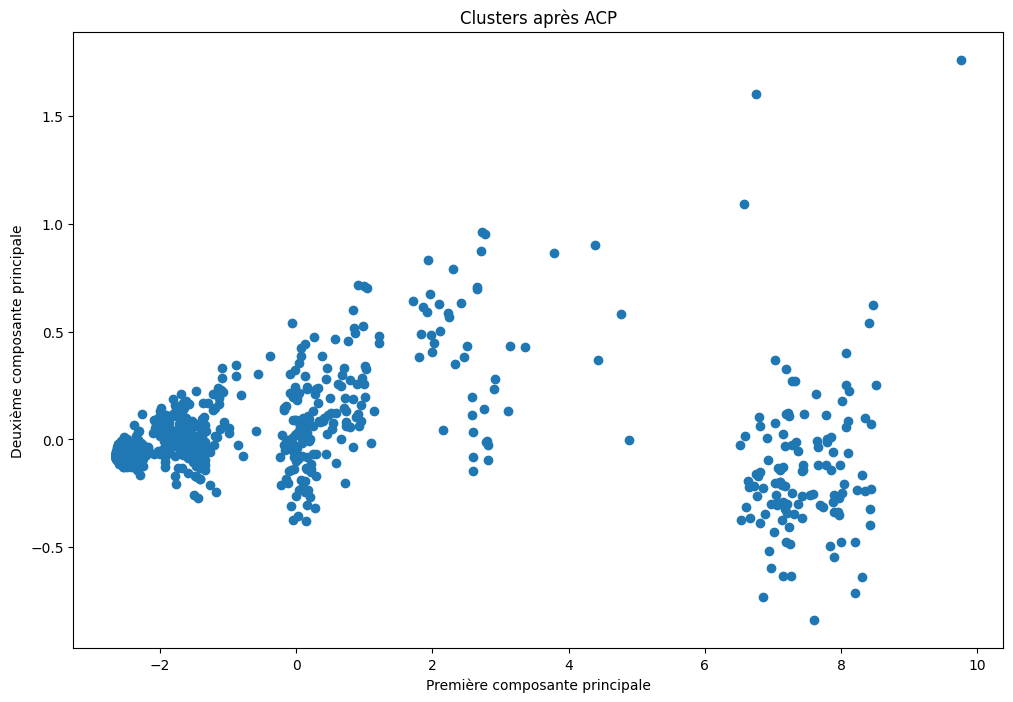

In [ ]:
features = df_monthly.columns[1:]
print(features)
X = df_monthly[features]

# Normaliser les données si nécessaire
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Appliquer l'ACP
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)


plt.figure(figsize=(12, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], cmap='viridis')
plt.title('Clusters après ACP')
plt.xlabel('Première composante principale')
plt.ylabel('Deuxième composante principale')


plt.show()

Index(['W0', 'W1', 'W2', 'W3', 'W4', 'W5', 'W6', 'W7', 'W8', 'W9', 'W10',
       'W11', 'W12', 'W13', 'W14', 'W15', 'W16', 'W17', 'W18', 'W19', 'W20',
       'W21', 'W22', 'W23', 'W24', 'W25', 'W26', 'W27', 'W28', 'W29', 'W30',
       'W31', 'W32', 'W33', 'W34', 'W35', 'W36', 'W37', 'W38', 'W39', 'W40',
       'W41', 'W42', 'W43', 'W44', 'W45', 'W46', 'W47', 'W48', 'W49', 'W50',
       'W51'],
      dtype='object')


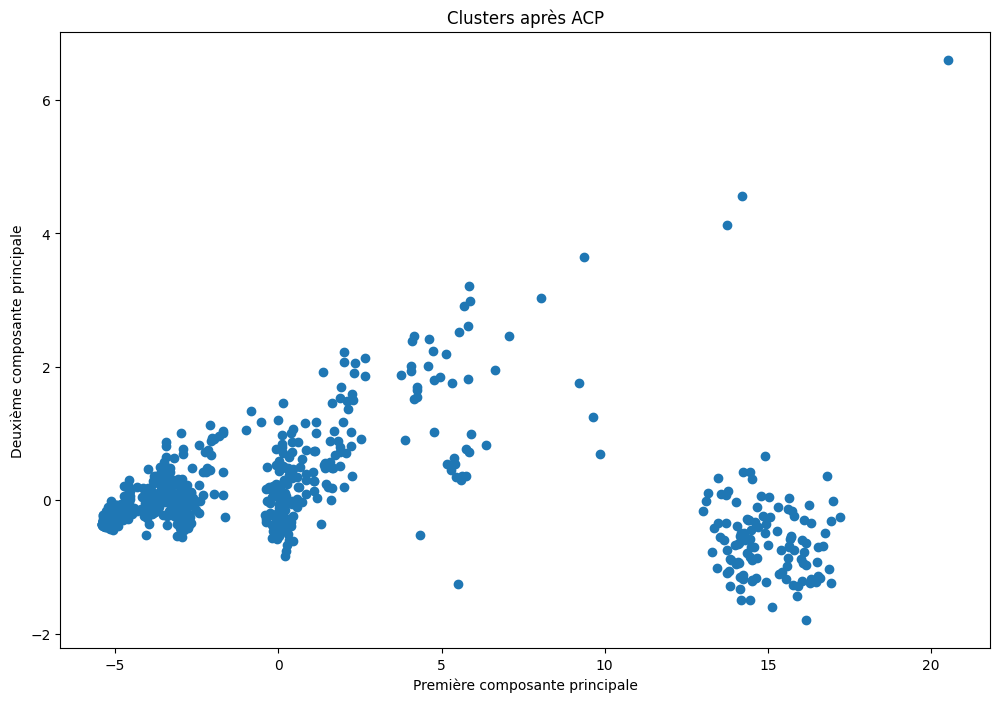

In [ ]:
features_weekly = df_weekly.drop(columns=['Total_Volume']).columns[1:53]
print(features_weekly)
X_weekly = df_weekly[features_weekly]

# Normaliser les données si nécessaire
scaler = StandardScaler()
X_scaled_weekly = scaler.fit_transform(X_weekly)

# Appliquer l'ACP
pca = PCA(n_components=2)
X_pca_weekly = pca.fit_transform(X_scaled_weekly)


plt.figure(figsize=(12, 8))
scatter = plt.scatter(X_pca_weekly[:, 0], X_pca_weekly[:, 1], cmap='viridis')
plt.title('Clusters après ACP')
plt.xlabel('Première composante principale')
plt.ylabel('Deuxième composante principale')


plt.show()

on peut remarquer que les clusters se dessinent assez bien que ce soit pour les données mensuelles ou hebdomadaires.

## **Cluestering des Produits :**

In [ ]:
features = df_monthly.columns[1:-1]
X = df_monthly[features]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=42)
df_monthly['Cluster'] = kmeans.fit_predict(X_scaled)

In [ ]:
df_monthly

,Product_Code,M0,M1,M2,M3,M4,M5,M6,M7,M8,M9,M10,M11,Cluster
0,P1,41,60,45,43,38,35,31,33,37,48,29,33,0
1,P2,18,17,10,14,25,17,21,14,18,17,13,11,2
2,P3,35,38,41,31,35,39,37,36,31,39,28,25,0
3,P4,38,37,36,31,39,31,35,17,41,30,37,21,0
4,P5,37,36,47,33,44,36,37,24,26,25,31,31,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
806,P815,1,3,1,3,3,1,0,2,0,3,2,2,2
807,P816,1,11,3,8,7,4,16,8,14,15,19,15,2
808,P817,1,5,2,0,0,1,2,0,1,0,3,4,2
809,P818,1,0,1,0,1,1,4,3,2,0,0,2,2


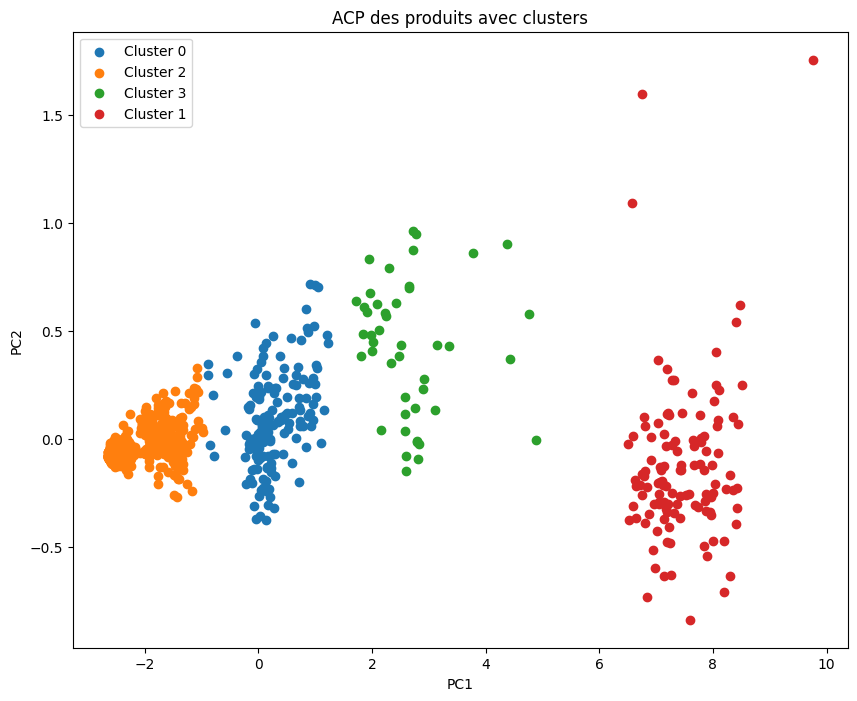

In [ ]:
features = df_monthly.loc[:, 'M0':'M11']

# Normalisation des données
features_normalized = (features - features.mean()) / features.std()

# Application de l'ACP
pca = PCA(n_components=2)
components = pca.fit_transform(features_normalized)

# Ajout des résultats de l'ACP au DataFrame
df_pca = pd.DataFrame(data=components, columns=['PC1', 'PC2'])
df_pca['Product_Code'] = df_monthly['Product_Code']
df_pca['Cluster'] = df_monthly['Cluster']

# Plot
plt.figure(figsize=(10, 8))
for cluster in df_monthly['Cluster'].unique():
    cluster_data = df_pca[df_pca['Cluster'] == cluster]
    plt.scatter(cluster_data['PC1'], cluster_data['PC2'], label=f'Cluster {cluster}')

plt.title('ACP des produits avec clusters')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

Pour donner une intérpretation à chaque Cluster, essayons de voir comment évoluent les ventes de chaque groupe de produits.
Pour celà, on va faire une moyenne des ventes par mois et par cluster et on affiche celà.

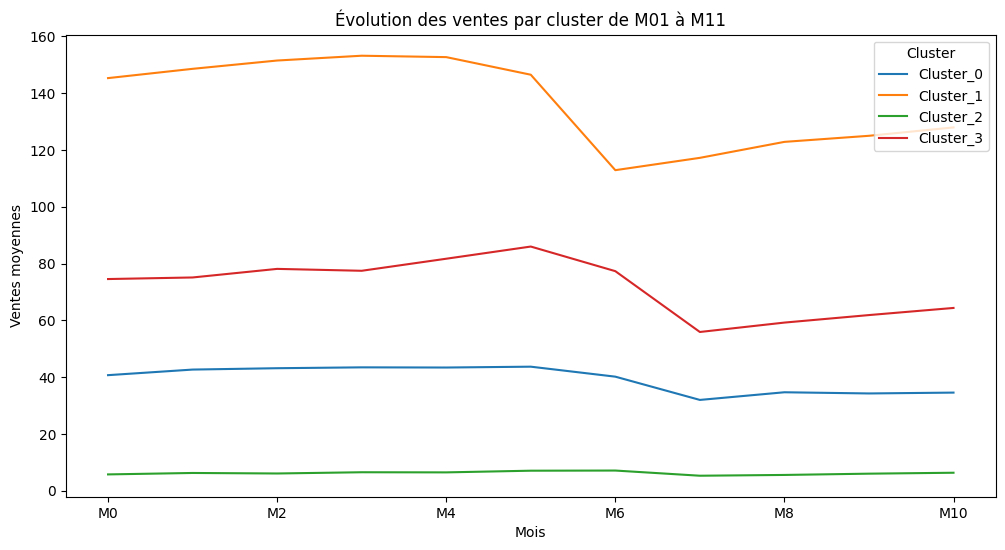

In [ ]:
import matplotlib.pyplot as plt

# Supposons que votre DataFrame s'appelle df_monthly

# Initialiser une liste pour stocker les DataFrames de chaque cluster
cluster_dfs = []

# Nombre total de clusters
num_clusters = df_monthly['Cluster'].nunique()

# Sélectionner les colonnes M0 à M11 pour le calcul des moyennes
features_columns = [f'M{i}' for i in range(0, 11)]
columns_to_average = features_columns

# Calculer les moyennes pour chaque cluster
for cluster_num in range(num_clusters):
    cluster_df = df_monthly[df_monthly['Cluster'] == cluster_num][columns_to_average].mean()
    cluster_dfs.append(cluster_df)

# Créer un DataFrame à partir de la liste de DataFrames
df_cluster_means = pd.DataFrame(cluster_dfs)

# Transposer le DataFrame pour avoir les mois en lignes
df_cluster_means = df_cluster_means.T

# Renommer les colonnes pour chaque cluster
df_cluster_means.columns = [f'Cluster_{i}' for i in range(num_clusters)]

# Plot
plt.figure(figsize=(12, 6))
df_cluster_means.plot(ax=plt.gca())
plt.title('Évolution des ventes par cluster de M01 à M11')
plt.xlabel('Mois')
plt.ylabel('Ventes moyennes')
plt.legend(title='Cluster')
plt.show()


On peut voir que les clusters 1 et 3 ont des évolutions similaires. De même pour les clusters 0 et 2.
Et comme on le voit sur le graphe d'ACP, les cluster les couples de cluster (1,3) et (0,2) sont relativement proches ce qui nous laisse deviner qu'on a probablement pas choisi le bon nombre de clusters.

Pour en être sûrs, essayons d'appliquer la méthode de l'elbow et voir que est le K idèal.

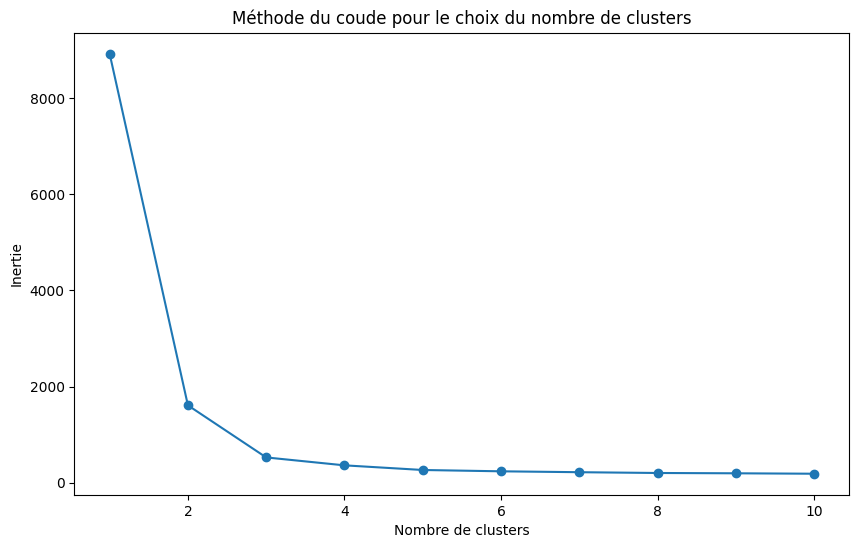

In [ ]:
inertia_values = []

# Testez différentes valeurs de k
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia_values.append(kmeans.inertia_)

# Tracez la courbe d'inertie
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia_values, marker='o')
plt.title('Méthode du coude pour le choix du nombre de clusters')
plt.xlabel('Nombre de clusters')
plt.ylabel('Inertie')
plt.show()

On voit bien que l'inertie commence à faiblement décroitre au delà de k=2.

In [ ]:
features = df_monthly.columns[1:-1]
X = df_monthly[features]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=2, random_state=42)
df_monthly['Cluster'] = kmeans.fit_predict(X_scaled)

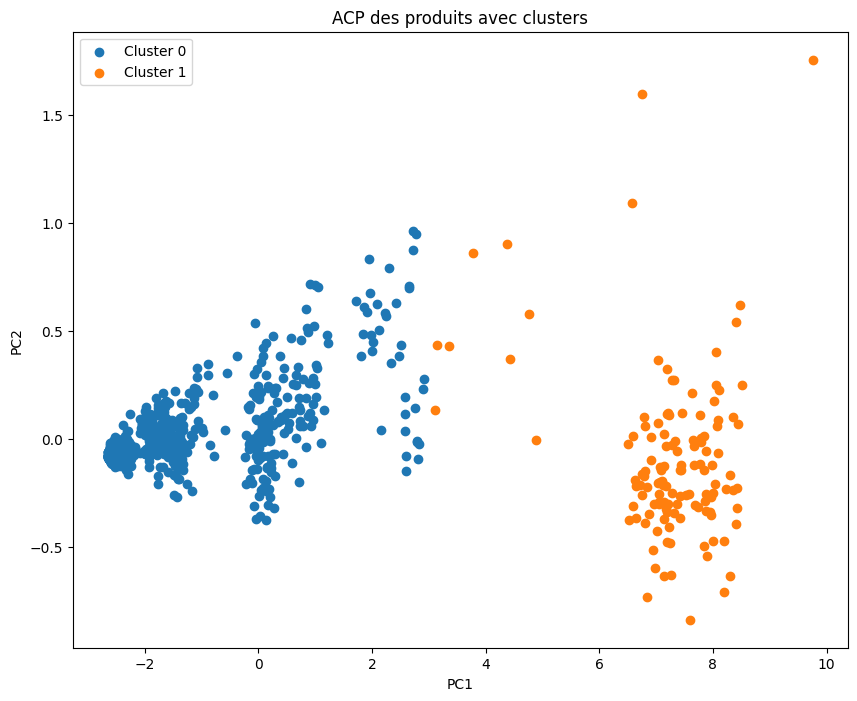

In [ ]:
features = df_monthly.loc[:, 'M0':'M11']

# Normalisation des données
features_normalized = (features - features.mean()) / features.std()

# Application de l'ACP
pca = PCA(n_components=2)
components = pca.fit_transform(features_normalized)

# Ajout des résultats de l'ACP au DataFrame
df_pca = pd.DataFrame(data=components, columns=['PC1', 'PC2'])
df_pca['Product_Code'] = df_monthly['Product_Code']
df_pca['Cluster'] = df_monthly['Cluster']

# Plot
plt.figure(figsize=(10, 8))
for cluster in df_monthly['Cluster'].unique():
    cluster_data = df_pca[df_pca['Cluster'] == cluster]
    plt.scatter(cluster_data['PC1'], cluster_data['PC2'], label=f'Cluster {cluster}')

plt.title('ACP des produits avec clusters')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

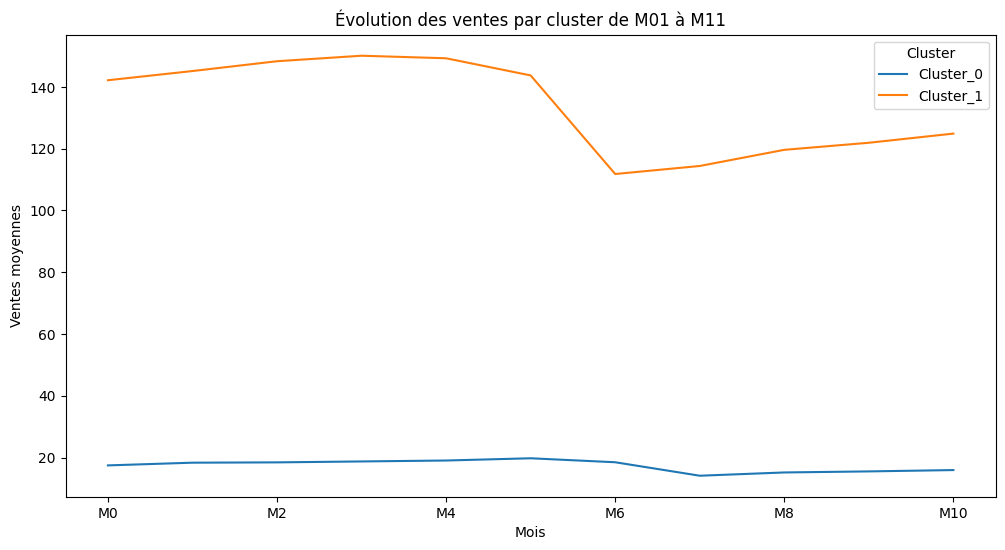

In [ ]:
import matplotlib.pyplot as plt

# Supposons que votre DataFrame s'appelle df_monthly

# Initialiser une liste pour stocker les DataFrames de chaque cluster
cluster_dfs = []

# Nombre total de clusters
num_clusters = df_monthly['Cluster'].nunique()

# Sélectionner les colonnes M0 à M11 pour le calcul des moyennes
features_columns = [f'M{i}' for i in range(0, 11)]
columns_to_average = features_columns

# Calculer les moyennes pour chaque cluster
for cluster_num in range(num_clusters):
    cluster_df = df_monthly[df_monthly['Cluster'] == cluster_num][columns_to_average].mean()
    cluster_dfs.append(cluster_df)

# Créer un DataFrame à partir de la liste de DataFrames
df_cluster_means = pd.DataFrame(cluster_dfs)

# Transposer le DataFrame pour avoir les mois en lignes
df_cluster_means = df_cluster_means.T

# Renommer les colonnes pour chaque cluster
df_cluster_means.columns = [f'Cluster_{i}' for i in range(num_clusters)]

# Plot
plt.figure(figsize=(12, 6))
df_cluster_means.plot(ax=plt.gca())
plt.title('Évolution des ventes par cluster de M01 à M11')
plt.xlabel('Mois')
plt.ylabel('Ventes moyennes')
plt.legend(title='Cluster')
plt.show()


On peut conclure dans un premier temps que le cluster 1 correspond aux produits dont les ventes sont plus importantes en début d'année. Et le cluster 0 sont les produits dont la vente est plutôt constante tout au long de l'année.

Pour en être sûr, essayons d'afficher l'évolution d'une dizaine de produits dans chaque cluster :

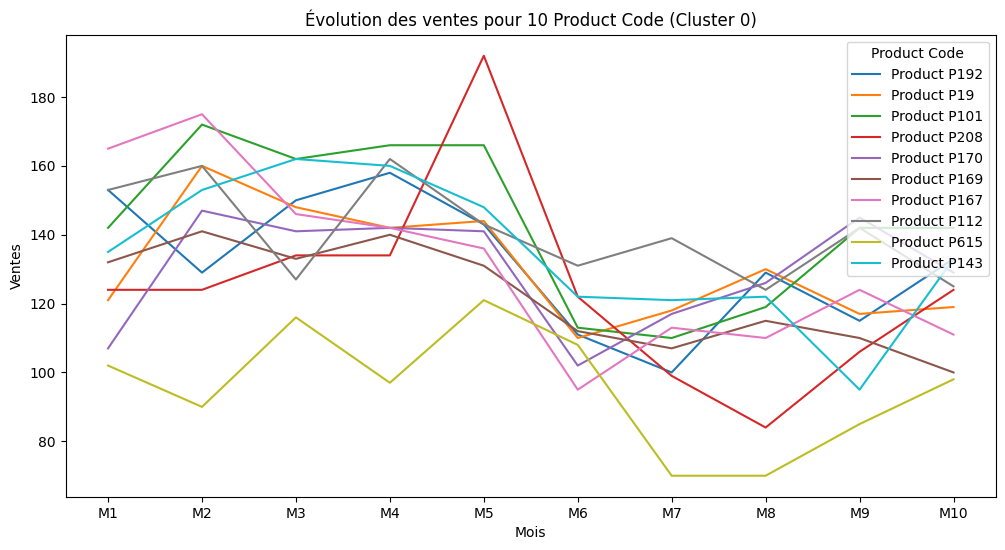

In [ ]:
df_cluster_1 = df_monthly[df_monthly['Cluster'] == 1]

# Sélectionner 10 Product Code aléatoires
random_product_codes = np.random.choice(df_cluster_1['Product_Code'].unique(), 10, replace=False)

# Sélectionner les colonnes M01 à M10 pour l'évolution des ventes
columns_to_plot = [f'M{i}' for i in range(1, 11)]

# Filtrer le DataFrame pour les Product Code et les colonnes spécifiés
df_selected = df_cluster_1[df_cluster_1['Product_Code'].isin(random_product_codes)][['Product_Code'] + columns_to_plot]

# Plot
plt.figure(figsize=(12, 6))
for product_code in random_product_codes:
    product_data = df_selected[df_selected['Product_Code'] == product_code]
    plt.plot(product_data.columns[1:], product_data.iloc[0, 1:], label=f'Product {product_code}')

plt.title('Évolution des ventes pour 10 Product Code (Cluster 0)')
plt.xlabel('Mois')
plt.ylabel('Ventes')
plt.legend(title='Product Code')
plt.show()

Les ventes sont bien décroissantes sur le cluster 1.

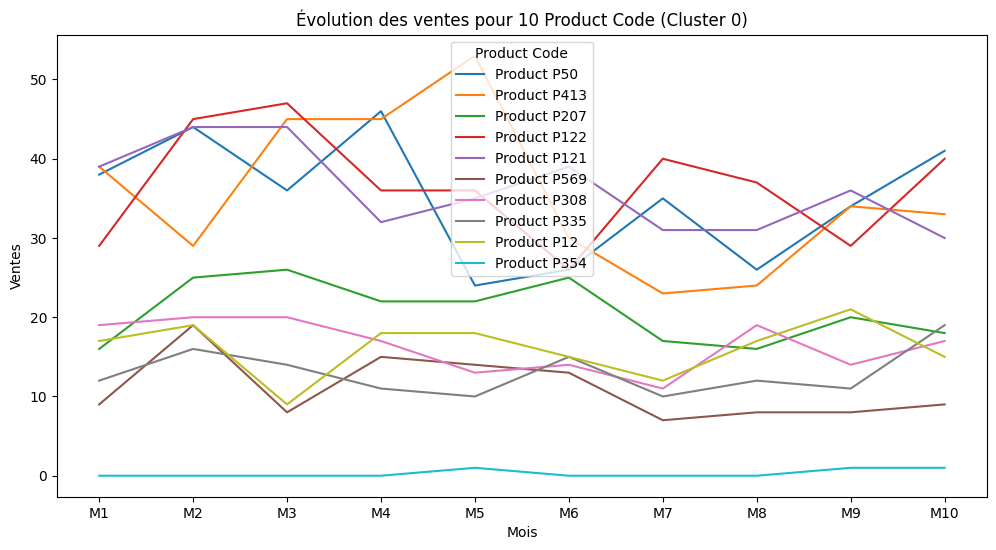

In [ ]:
df_cluster_0 = df_monthly[df_monthly['Cluster'] == 0]

# Sélectionner 10 Product Code aléatoires
random_product_codes = np.random.choice(df_cluster_0['Product_Code'].unique(), 10, replace=False)

# Sélectionner les colonnes M01 à M10 pour l'évolution des ventes
columns_to_plot = [f'M{i}' for i in range(1, 11)]

# Filtrer le DataFrame pour les Product Code et les colonnes spécifiés
df_selected = df_cluster_0[df_cluster_0['Product_Code'].isin(random_product_codes)][['Product_Code'] + columns_to_plot]

# Plot
plt.figure(figsize=(12, 6))
for product_code in random_product_codes:
    product_data = df_selected[df_selected['Product_Code'] == product_code]
    plt.plot(product_data.columns[1:], product_data.iloc[0, 1:], label=f'Product {product_code}')

plt.title('Évolution des ventes pour 10 Product Code (Cluster 0)')
plt.xlabel('Mois')
plt.ylabel('Ventes')
plt.legend(title='Product Code')
plt.show()

Les ventes sont relativement constantes sur le cluster 0. Sauf pour certains produits, qui auraient bien vu le place dans le cluster 1 comme pour le produit 413.

Celà est normal d'avoir des chevauchement de cluster car on voit bien dans le nuage de points que la frontière entre les deux clusters est relativement difficile à tracer. Pour aller plus loin et pour avoir des clusters bien définis, on devra attendres les données de ventes des prochaines années.